In [1]:
import pygrib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import cartopy.crs as ccrs
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap
from sklearn.cluster import KMeans

In [2]:
gribs = pygrib.open('../../ECERA5/sst_1979to2022_monthly_mean.grib')

In [3]:
grbs = []
for tmp in gribs:
    yy = int(tmp['year'])
    if(yy<1991): continue
    if(yy>2020): continue
    grbs.append(tmp)

In [4]:
ntime = len(grbs)
print(ntime)

360


In [5]:
lat1 = -30
lat2 = 30
lon1 = 120
lon2 = 300

In [6]:
grb = gribs.message(145)
data, lats, lons = grb.data(lat1=lat1,lat2=lat2,lon1=lon1,lon2=lon2)
data.shape, lats.min(), lats.max(), lons.min(), lons.max()

((241, 721), -30.0, 30.0, 120.0, 300.0)

In [7]:
#test
happy = data[data.mask==False]
happy.size

150136

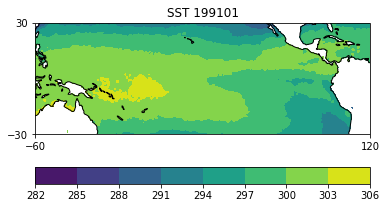

In [8]:
projection = ccrs.PlateCarree(central_longitude=180)
fig, ax = plt.subplots(subplot_kw={'projection': projection})
pcm = ax.contourf(lons-180, lats, data, transform=projection)
ax.coastlines()
ax.set_title(f'SST {grb["year"]}{grb["month"]:02d}')
ax.set_xticks([lon1,lon2], crs=ccrs.PlateCarree())
ax.set_yticks([lat1,lat2], crs=ccrs.PlateCarree())
fig.colorbar(pcm, ax=ax, orientation="horizontal")
plt.show()

In [9]:
def drawpic(tmp, data, i):
    projection = ccrs.PlateCarree(central_longitude=180)
    fig, ax = plt.subplots(subplot_kw={'projection': projection})
    pcm = ax.contourf(lons-180, lats, data, levels=np.arange(279,307), transform=projection)
    ax.coastlines()
    ax.set_title(f'{tmp["year"]}{tmp["month"]:02d}')
    ax.set_xticks([lon1,lon2], crs=ccrs.PlateCarree())
    ax.set_yticks([lat1,lat2], crs=ccrs.PlateCarree())
    fig.colorbar(pcm, ax=ax, orientation="horizontal")
    fig.savefig(f'./sst/sst{i:03d}')
    plt.close(fig)

In [10]:
X = np.zeros([ntime, data[data.mask==False].size])

In [11]:
i=0
for tmp in grbs:
    print(tmp)
    data, lats, lons = tmp.data(lat1=lat1,lat2=lat2,lon1=lon1,lon2=lon2)
    # drawpic(tmp, data, i)
    X[i,:] = data[data.mask==False]
    i=i+1

145:Sea surface temperature:K (avgua):regular_ll:surface:level 0:fcst time 0 hrs (avgua):from 199101010000
146:Sea surface temperature:K (avgua):regular_ll:surface:level 0:fcst time 0 hrs (avgua):from 199102010000
147:Sea surface temperature:K (avgua):regular_ll:surface:level 0:fcst time 0 hrs (avgua):from 199103010000
148:Sea surface temperature:K (avgua):regular_ll:surface:level 0:fcst time 0 hrs (avgua):from 199104010000
149:Sea surface temperature:K (avgua):regular_ll:surface:level 0:fcst time 0 hrs (avgua):from 199105010000
150:Sea surface temperature:K (avgua):regular_ll:surface:level 0:fcst time 0 hrs (avgua):from 199106010000
151:Sea surface temperature:K (avgua):regular_ll:surface:level 0:fcst time 0 hrs (avgua):from 199107010000
152:Sea surface temperature:K (avgua):regular_ll:surface:level 0:fcst time 0 hrs (avgua):from 199108010000
153:Sea surface temperature:K (avgua):regular_ll:surface:level 0:fcst time 0 hrs (avgua):from 199109010000
154:Sea surface temperature:K (avgua)

In [12]:
X_mean = np.zeros([12,X.shape[1]])
i=0
for arr in X:
    if(i==12): i=0
    X_mean[i,:] = X_mean[i,:] + arr
    i=i+1
X_mean = X_mean/30
X_variation = np.copy(X)
i=0
for iarr in range(len(X_variation)):
    if(i==12): i=0
    X_variation[iarr,:] = X_variation[iarr,:] - X_mean[i,:]
    i=i+1
print(X_variation)

[[ 0.53979492  0.61886393  0.25229492 ... -0.03367513 -0.11638997
  -0.18953451]
 [ 1.00038249  0.99615072  0.64989421 ... -0.66514486 -0.67549642
  -0.68718262]
 [ 0.17759603  0.09777832 -0.08539225 ... -0.18005371 -0.13145345
  -0.11914876]
 ...
 [ 0.23491211 -0.00613607  0.04272461 ... -0.72898763 -0.64845378
  -0.52195638]
 [ 1.13775228  0.92287598  0.83055827 ... -0.79411621 -0.77653809
  -0.7088623 ]
 [ 0.91501465  0.56520996  1.12289225 ... -1.18052572 -1.08798014
  -0.91392415]]


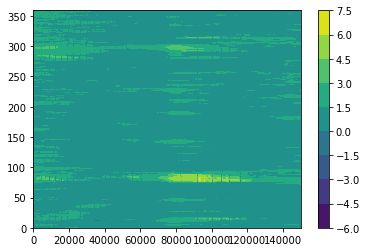

In [13]:
plt.figure()
plt.contourf(X_variation)
plt.colorbar()
plt.show()

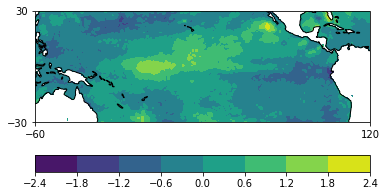

In [14]:
#test
i=0
for idx, tmp in np.ndenumerate(data):
    if(data.mask[idx]==True): continue
    data[idx]=X_variation[0,i]
    i = i+1
projection = ccrs.PlateCarree(central_longitude=180)
fig, ax = plt.subplots(subplot_kw={'projection': projection})
pcm = ax.contourf(lons-180, lats, data, transform=projection)
ax.coastlines()
ax.set_xticks([lon1,lon2], crs=ccrs.PlateCarree())
ax.set_yticks([lat1,lat2], crs=ccrs.PlateCarree())
fig.colorbar(pcm, ax=ax, orientation="horizontal")
plt.show()

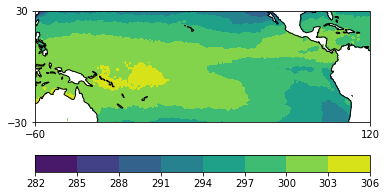

In [15]:
#test
happy, tmp, tmp = grbs[0].data(lat1=lat1,lat2=lat2,lon1=lon1,lon2=lon2)
projection = ccrs.PlateCarree(central_longitude=180)
fig, ax = plt.subplots(subplot_kw={'projection': projection})
pcm = ax.contourf(lons-180, lats, happy, transform=projection)
ax.coastlines()
ax.set_xticks([lon1,lon2], crs=ccrs.PlateCarree())
ax.set_yticks([lat1,lat2], crs=ccrs.PlateCarree())
fig.colorbar(pcm, ax=ax, orientation="horizontal")
plt.show()

In [16]:
oni = pd.read_csv('oni').iloc[-14-360:-14,3].to_numpy()
oni_id = np.zeros(len(oni))
oni_id[oni>=0.5]=1
oni_id[oni<=-0.5]=-1

In [17]:
pd.read_csv('oni').iloc[-14-360:-14,:]

,SEAS,YR,TOTAL,ANOM
492,DJF,1991,27.02,0.41
493,JFM,1991,27.15,0.26
494,FMA,1991,27.48,0.22
495,MAM,1991,27.85,0.26
496,AMJ,1991,28.16,0.45
...,...,...,...,...
847,JAS,2020,26.38,-0.57
848,ASO,2020,25.87,-0.89
849,SON,2020,25.54,-1.17
850,OND,2020,25.40,-1.27


# PCA

In [18]:
pca = PCA(n_components=20,svd_solver='full')
train_reduced = pca.fit_transform(X_variation)
print(pca.explained_variance_ratio_)

[0.35517162 0.09303926 0.08098589 0.0427681  0.03801461 0.03467771
 0.02441453 0.02095592 0.01694431 0.01614771 0.01229561 0.0119949
 0.01052548 0.00937357 0.00921509 0.00851137 0.00805451 0.00710536
 0.00686343 0.00673247]


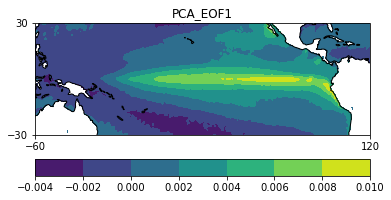

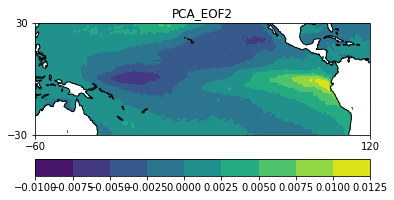

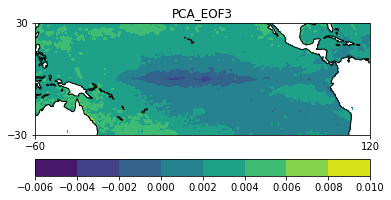

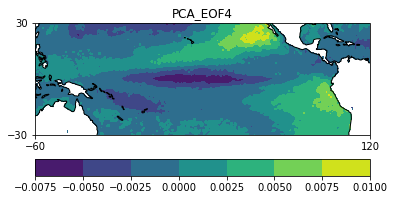

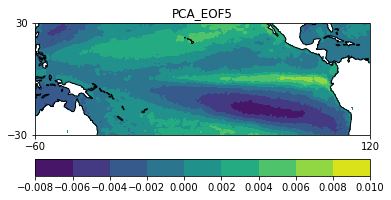

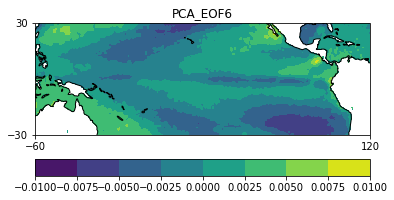

In [19]:
# EOF
for n in range(1,7):
    iEOF = n
    i=0
    for idx, tmp in np.ndenumerate(data):
        if(data.mask[idx]==True): continue
        data[idx]=pca.components_[iEOF-1,i]
        i = i+1
    projection = ccrs.PlateCarree(central_longitude=180)
    fig, ax = plt.subplots(subplot_kw={'projection': projection},figsize=(6,3))
    pcm = ax.contourf(lons-180, lats, data, transform=projection)
    ax.coastlines()
    ax.set_title(f'PCA_EOF{iEOF}')
    ax.set_xticks([lon1,lon2], crs=ccrs.PlateCarree())
    ax.set_yticks([lat1,lat2], crs=ccrs.PlateCarree())
    fig.colorbar(pcm, ax=ax, orientation="horizontal")
    plt.show()

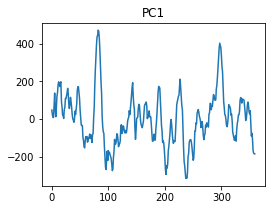

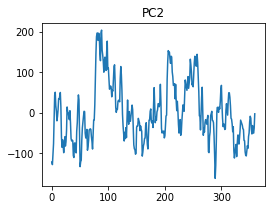

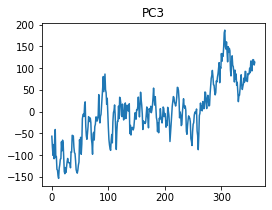

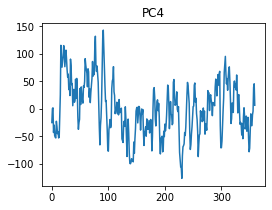

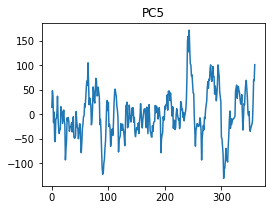

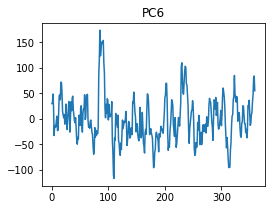

In [20]:
plt.figure(figsize=(4,3))
plt.plot(train_reduced[:,0])
plt.title(f'PC1')
plt.show()
plt.figure(figsize=(4,3))
plt.plot(train_reduced[:,1])
plt.title(f'PC2')
plt.show()
plt.figure(figsize=(4,3))
plt.plot(train_reduced[:,2])
plt.title(f'PC3')
plt.show()
plt.figure(figsize=(4,3))
plt.plot(train_reduced[:,3])
plt.title(f'PC4')
plt.show()
plt.figure(figsize=(4,3))
plt.plot(train_reduced[:,4])
plt.title(f'PC5')
plt.show()
plt.figure(figsize=(4,3))
plt.plot(train_reduced[:,5])
plt.title(f'PC6')
plt.show()

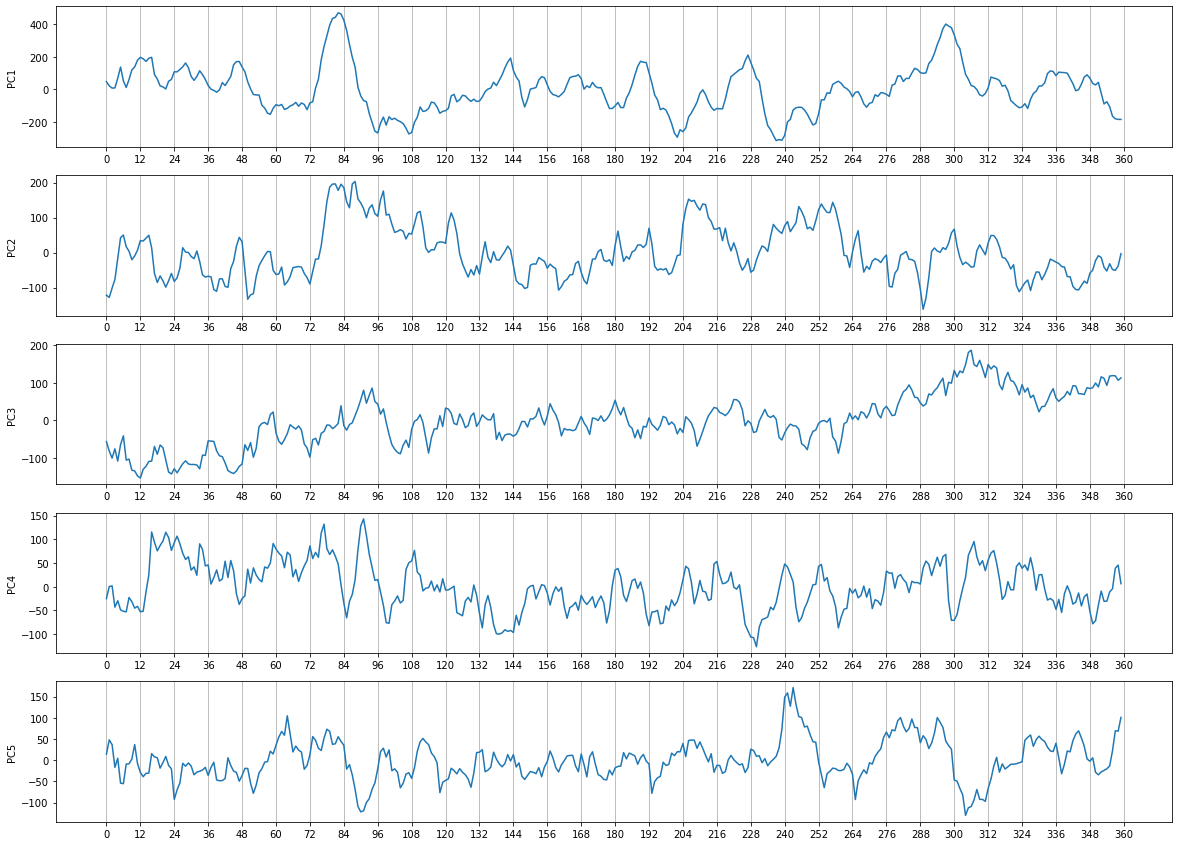

In [21]:
n=5
fig, ax = plt.subplots(n,1,figsize=(20,3*n))
for i in range(n):
    ax[i].plot(train_reduced[:,i])
    ax[i].set_xticks(np.arange(0,361,12))
    ax[i].set_ylabel(f'PC{i+1}')
    ax[i].grid(axis='x')
plt.show()

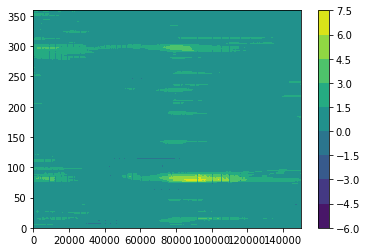

In [22]:
happy = np.zeros_like(X_variation)
err_pca=[]
for i in range(20):
    happy += np.outer(train_reduced[:,i].real,pca.components_[i,:].real)
    cc = np.sum(np.dot(happy.flatten()-np.mean(happy.flatten()),X_variation.flatten()-np.mean(X_variation.flatten())))**2/\
        np.sum(np.square(happy.flatten()-np.mean(happy.flatten())))/\
        np.sum(np.square(X_variation.flatten()-np.mean(X_variation.flatten())))
    err_pca.append(1-cc)
plt.figure()
plt.contourf(happy, levels=np.arange(-6,7.6,1.5))
plt.colorbar()
plt.show()

[0.6448283775712742, 0.5517891170027903, 0.4708032225642306, 0.4280351269901388, 0.39002051539731175, 0.35534280130070084, 0.3309282726624816, 0.30997235349425356, 0.2930280478709322, 0.2768803426253711, 0.2645847305118376, 0.25258982829204546, 0.2420643456803766, 0.23269077458818954, 0.22347568696666986, 0.21496431693304863, 0.20690980783767, 0.1998044487292856, 0.19294101978664313, 0.18620854939187903]


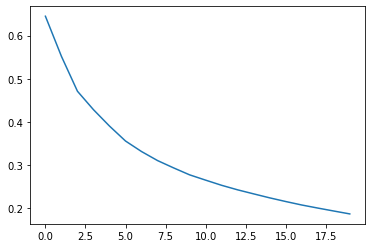

In [23]:
print(err_pca)
plt.plot(err_pca)

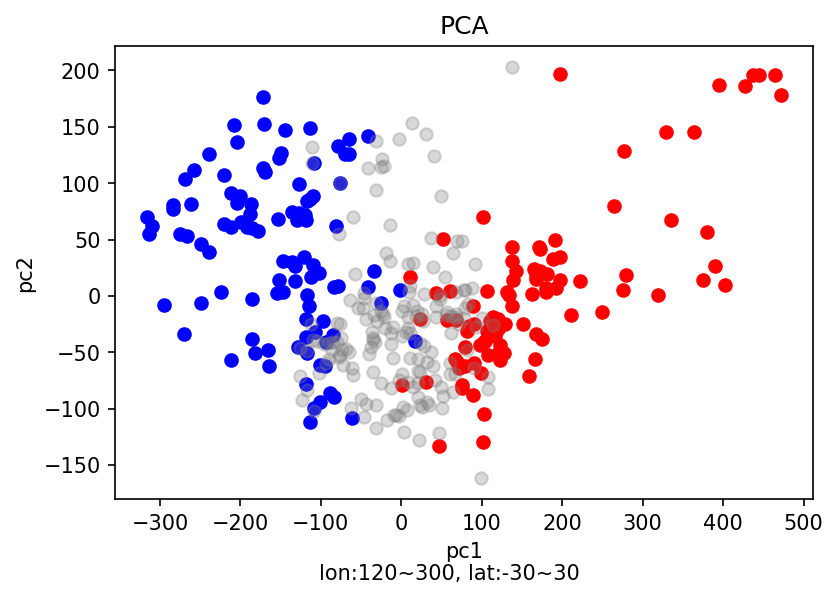

In [58]:
fig0, ax0 = plt.subplots(dpi=150)
# ax.set_xlim(-250,250)
# ax.set_ylim(-80,120)
ax0.scatter(train_reduced[oni>=0.5,0],train_reduced[oni>=0.5,1],color=[1,0,0])
ax0.scatter(train_reduced[oni<=-0.5,0],train_reduced[oni<=-0.5,1],color=[0,0,1])
ax0.scatter(train_reduced[oni_id==0,0],train_reduced[oni_id==0,1],color=[0.5,0.5,0.5],alpha=0.3)
ax0.set_xlabel(f'pc1')
ax0.set_ylabel(f'pc2')
ax0.set_title(f'PCA')
fig0.text(s=f'lon:{lon1}~{lon2}, lat:{lat1}~{lat2} ', x=0.5, y=0, fontsize=10, ha='center', va='center')
plt.show()

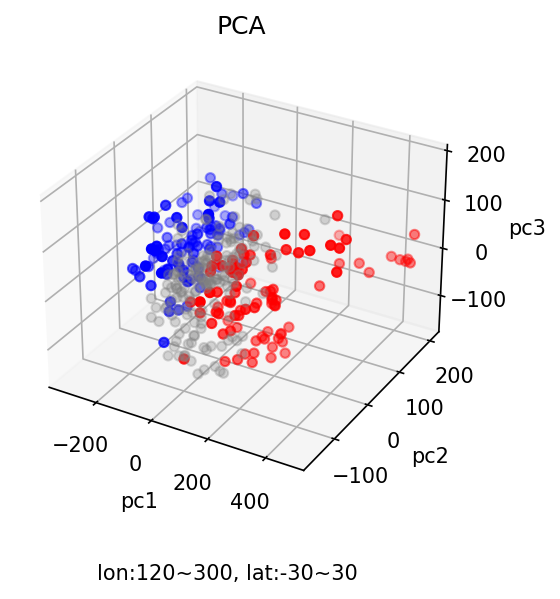

In [53]:
fig = plt.figure(dpi=150)
ax = fig.add_subplot(projection='3d')
# ax.set_xlim(-250,250)
# ax.set_ylim(-80,120)
ax.scatter(train_reduced[oni>=0.5,0],train_reduced[oni>=0.5,1],train_reduced[oni>=0.5,2],color=[1,0,0])
ax.scatter(train_reduced[oni<=-0.5,0],train_reduced[oni<=-0.5,1],train_reduced[oni<=-0.5,2],color=[0,0,1])
ax.scatter(train_reduced[oni_id==0,0],train_reduced[oni_id==0,1],train_reduced[oni_id==0,2],color=[0.5,0.5,0.5],alpha=0.3)
ax.set_xlabel(f'pc1')
ax.set_ylabel(f'pc2')
ax.set_zlabel(f'pc3')
ax.set_title(f'PCA')
fig.text(s=f'lon:{lon1}~{lon2}, lat:{lat1}~{lat2} ', x=0.5, y=0, fontsize=10, ha='center', va='center')
plt.show()

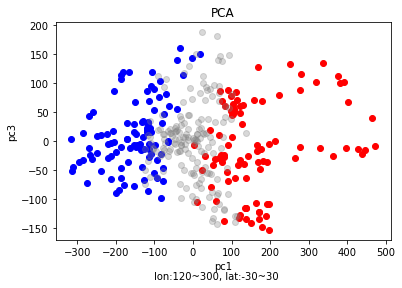

In [26]:
fig0, ax0 = plt.subplots()
# ax.set_xlim(-250,250)
# ax.set_ylim(-80,120)
ax0.scatter(train_reduced[oni>=0.5,0],train_reduced[oni>=0.5,2],color=[1,0,0])
ax0.scatter(train_reduced[oni<=-0.5,0],train_reduced[oni<=-0.5,2],color=[0,0,1])
ax0.scatter(train_reduced[oni_id==0,0],train_reduced[oni_id==0,2],color=[0.5,0.5,0.5],alpha=0.3)
ax0.set_xlabel(f'pc1')
ax0.set_ylabel(f'pc3')
ax0.set_title(f'PCA')
fig0.text(s=f'lon:{lon1}~{lon2}, lat:{lat1}~{lat2} ', x=0.5, y=0, fontsize=10, ha='center', va='center')
plt.show()

In [27]:
# 3D animation
# for nn in range(1,len(train_reduced)):
#     fig = plt.figure()
#     ax = fig.add_subplot(projection='3d')
#     ax.set_xlim(-900,900)
#     ax.set_ylim(-500,500)
#     ax.set_zlim(-350,350)
#     # for i in range(1,nn):
#     #     alpha = i/nn
#     for i in range(max(1,nn-24),nn):
#         alpha = (i-nn+24)/24
#         color = [0.5,0.5,0.5]
#         if(oni[i]>=0.5): color = [1,0,0]
#         if(oni[i]<=-0.5): color = [0,0,1]
#         ax.plot3D(train_reduced[i-1:i+1,0],train_reduced[i-1:i+1,1],train_reduced[i-1:i+1,2], color=[0.5,0.5,0.5], alpha=alpha)
#         ax.scatter3D(train_reduced[i,0],train_reduced[i,1],train_reduced[i,2], color=color, alpha=alpha)
#     fig.savefig(f'./pca_gif/pca{nn:03d}.jpg',dpi=200)
#     plt.close(fig)

# Isomap

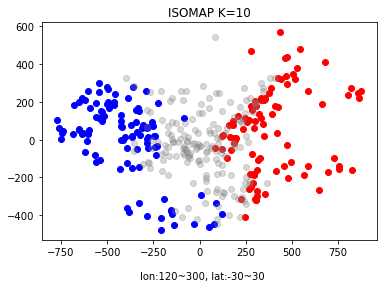

In [28]:
k=10
isomap_model = Isomap(n_components=3, n_neighbors=k)
isomap_result = isomap_model.fit_transform(X_variation)

fig, ax = plt.subplots()
ax.scatter(isomap_result[oni>=0.5,0],isomap_result[oni>=0.5,1], c='red')
ax.scatter(isomap_result[oni<=-0.5,0],isomap_result[oni<=-0.5,1], c='blue')
ax.scatter(isomap_result[oni_id==0,0],isomap_result[oni_id==0,1],color=[0.5,0.5,0.5],alpha=0.3)
ax.set_title(f'ISOMAP K={k}')
fig.text(s=f'lon:{lon1}~{lon2}, lat:{lat1}~{lat2} ', x=0.5, y=0, fontsize=10, ha='center', va='center')
plt.show()

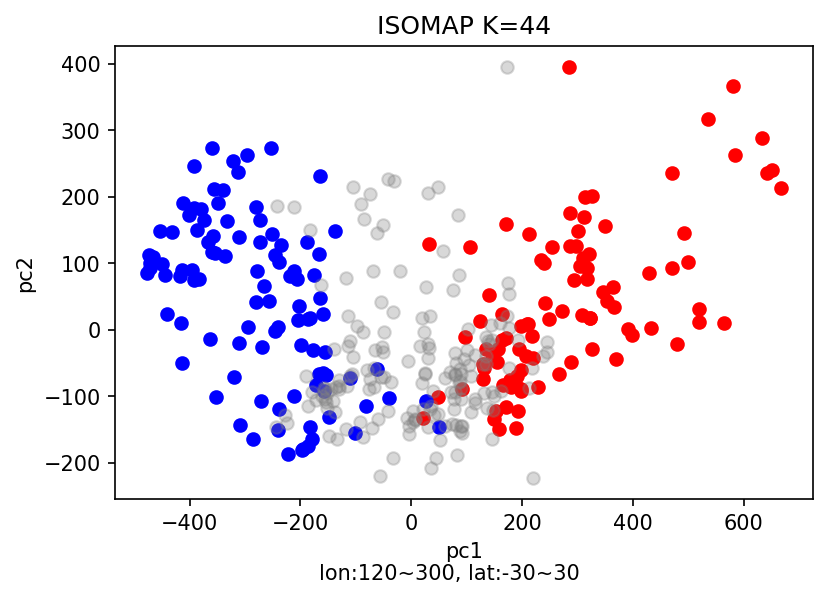

In [57]:
k=44
isomap_model = Isomap(n_components=20, n_neighbors=k)
isomap_result = isomap_model.fit_transform(X_variation)

fig, ax = plt.subplots(dpi=150)
ax.scatter(isomap_result[oni>=0.5,0],isomap_result[oni>=0.5,1], c='red')
ax.scatter(isomap_result[oni<=-0.5,0],isomap_result[oni<=-0.5,1], c='blue')
ax.scatter(isomap_result[oni_id==0,0],isomap_result[oni_id==0,1],color=[0.5,0.5,0.5],alpha=0.3)
ax.set_xlabel(f'pc1')
ax.set_ylabel(f'pc2')
ax.set_title(f'ISOMAP K={k}')
fig.text(s=f'lon:{lon1}~{lon2}, lat:{lat1}~{lat2} ', x=0.5, y=0, fontsize=10, ha='center', va='center')
plt.show()

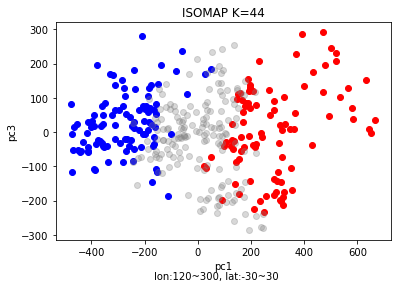

In [30]:
k=44
isomap_model = Isomap(n_components=20, n_neighbors=k)
isomap_result = isomap_model.fit_transform(X_variation)

fig, ax = plt.subplots()
ax.scatter(isomap_result[oni>=0.5,0],isomap_result[oni>=0.5,2], c='red')
ax.scatter(isomap_result[oni<=-0.5,0],isomap_result[oni<=-0.5,2], c='blue')
ax.scatter(isomap_result[oni_id==0,0],isomap_result[oni_id==0,2],color=[0.5,0.5,0.5],alpha=0.3)
ax.set_xlabel(f'pc1')
ax.set_ylabel(f'pc3')
ax.set_title(f'ISOMAP K={k}')
fig.text(s=f'lon:{lon1}~{lon2}, lat:{lat1}~{lat2} ', x=0.5, y=0, fontsize=10, ha='center', va='center')
plt.show()

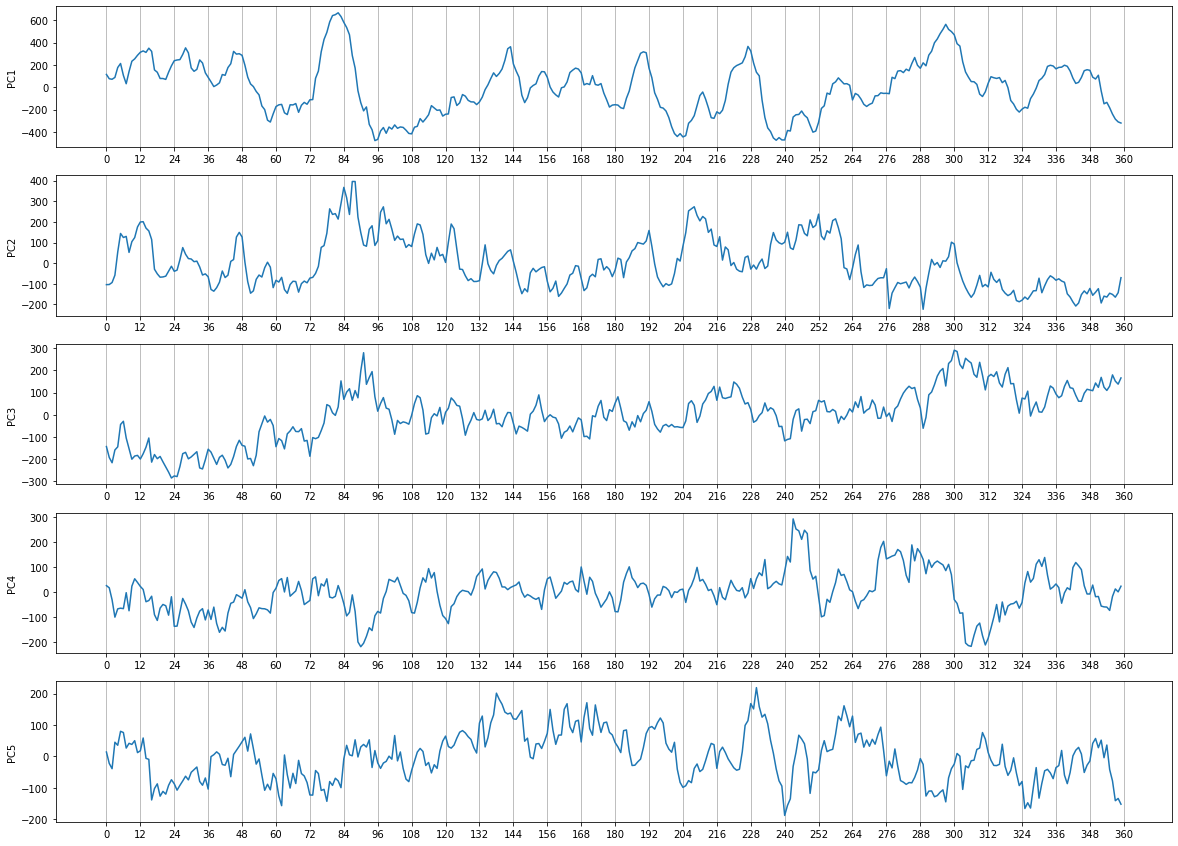

In [31]:
n=5
fig, ax = plt.subplots(n,1,figsize=(20,3*n))
for i in range(n):
    ax[i].plot(isomap_result[:,i])
    ax[i].set_xticks(np.arange(0,361,12))
    ax[i].set_ylabel(f'PC{i+1}')
    ax[i].grid(axis='x')
plt.show()

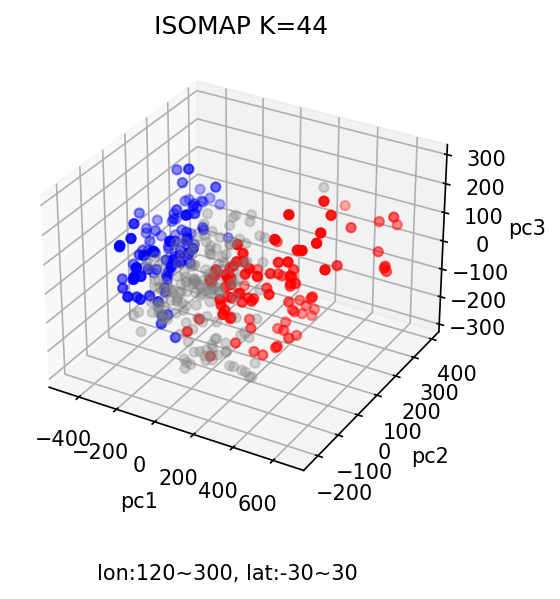

In [54]:
k=44
isomap_model = Isomap(n_components=3, n_neighbors=k)
isomap_result = isomap_model.fit_transform(X_variation)

fig = plt.figure(dpi=150)
ax = fig.add_subplot(projection='3d')
# ax.set_xlim(-250,250)
# ax.set_ylim(-80,120)
ax.scatter(isomap_result[oni>=0.5,0],isomap_result[oni>=0.5,1],isomap_result[oni>=0.5,2],color=[1,0,0])
ax.scatter(isomap_result[oni<=-0.5,0],isomap_result[oni<=-0.5,1],isomap_result[oni<=-0.5,2],color=[0,0,1])
ax.scatter(isomap_result[oni_id==0,0],isomap_result[oni_id==0,1],isomap_result[oni_id==0,2],color=[0.5,0.5,0.5],alpha=0.3)
ax.set_xlabel(f'pc1')
ax.set_ylabel(f'pc2')
ax.set_zlabel(f'pc3')
ax.set_title(f'ISOMAP K={k}')
fig.text(s=f'lon:{lon1}~{lon2}, lat:{lat1}~{lat2} ', x=0.5, y=0, fontsize=10, ha='center', va='center')
plt.show()

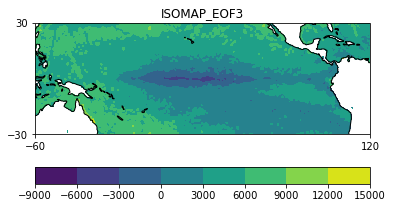

In [33]:
# EOF
happy = np.matmul(X_variation.transpose(),train_reduced).transpose()
iEOF = 3
i=0
for idx, tmp in np.ndenumerate(data):
    if(data.mask[idx]==True): continue
    data[idx]=happy[iEOF-1,i]
    i = i+1
projection = ccrs.PlateCarree(central_longitude=180)
fig, ax = plt.subplots(subplot_kw={'projection': projection})
pcm = ax.contourf(lons-180, lats, data, transform=projection)
ax.coastlines()
ax.set_title(f'ISOMAP_EOF{iEOF}')
ax.set_xticks([lon1,lon2], crs=ccrs.PlateCarree())
ax.set_yticks([lat1,lat2], crs=ccrs.PlateCarree())
fig.colorbar(pcm, ax=ax, orientation="horizontal")
plt.show()

In [34]:
# for nn in range(1,len(isomap_result)):
#     fig = plt.figure()
#     ax = fig.add_subplot(projection='3d')
#     ax.set_xlim(-500,700)
#     ax.set_ylim(-200,550)
#     ax.set_zlim(-350,350)
#     # for i in range(1,nn):
#     #     alpha = i/nn
#     for i in range(max(1,nn-24),nn):
#         alpha = (i-nn+24)/24
#         color = [0.5,0.5,0.5]
#         if(oni[i]>=0.5): color = [1,0,0]
#         if(oni[i]<=-0.5): color = [0,0,1]
#         ax.plot3D(isomap_result[i-1:i+1,0],isomap_result[i-1:i+1,1],isomap_result[i-1:i+1,2], color=[0.5,0.5,0.5], alpha=alpha)
#         ax.scatter3D(isomap_result[i,0],isomap_result[i,1],isomap_result[i,2], color=color, alpha=alpha)
#         ax.set_xlabel(f'pc1')
#         ax.set_ylabel(f'pc2')
#         ax.set_zlabel(f'pc3')
#         ax.set_title(f'ISOMAP K={k}')
#         fig.text(s=f'lon:{lon1}~{lon2}, lat:{lat1}~{lat2} ', x=0.5, y=0, fontsize=10, ha='center', va='center')
#     fig.savefig(f'./isomap_gif_minusmean/isomap{nn:03d}.jpg',dpi=200)
#     plt.close(fig)

In [35]:
isomap_model = Isomap(n_components=6, n_neighbors=44)
isomap_result = isomap_model.fit_transform(X_variation)

In [36]:
isomap_model.kernel_pca_.eigenvalues_

array([20671127.80762849,  5322387.28070109,  4727562.24841414,
        2435254.04868316,  2173483.90755349,  2078041.60321995])

In [37]:
ddd = -0.5*isomap_model.dist_matrix_**2

(360, 3)


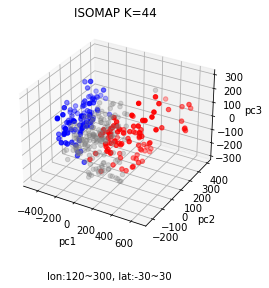

In [38]:
from sklearn.decomposition import KernelPCA
kernelpca = KernelPCA(kernel="precomputed",n_components=3)
eig_vec_cov = kernelpca.fit_transform(ddd)
# eig_val_cov, eig_vec_cov = np.linalg.eig(ddd)
# eig_vec_cov, eig_val_cov, happy = np.linalg.svd(ddd, full_matrices=True)
print(eig_vec_cov.shape)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
# ax.set_xlim(-250,250)
# ax.set_ylim(-80,120)
ax.scatter(eig_vec_cov[oni>=0.5,0],eig_vec_cov[oni>=0.5,1],eig_vec_cov[oni>=0.5,2],color=[1,0,0])
ax.scatter(eig_vec_cov[oni<=-0.5,0],eig_vec_cov[oni<=-0.5,1],eig_vec_cov[oni<=-0.5,2],color=[0,0,1])
ax.scatter(eig_vec_cov[oni_id==0,0],eig_vec_cov[oni_id==0,1],eig_vec_cov[oni_id==0,2],color=[0.5,0.5,0.5],alpha=0.3)
ax.set_xlabel(f'pc1')
ax.set_ylabel(f'pc2')
ax.set_zlabel(f'pc3')
ax.set_title(f'ISOMAP K={k}')
fig.text(s=f'lon:{lon1}~{lon2}, lat:{lat1}~{lat2} ', x=0.5, y=0, fontsize=10, ha='center', va='center')
plt.show()

In [39]:
def mds(data, n_components=3):
    
    n_samples = data.shape[0]

    # Mean for each row/column
    meanrows = np.sum(data, axis=0) / n_samples
    meancols = (np.sum(data, axis=1)/n_samples)[:, np.newaxis]

    # Mean across all rows (entire matrix)
    meanall = meanrows.sum() / n_samples

    # Center distance matrix
    cen_matrix = np.copy(data)
    cen_matrix -= meanrows
    cen_matrix -= meancols
    cen_matrix += meanall
    # Make a list of (eigenvalue, eigenvector) tuples
    eig_val_cov, eig_vec_cov = np.linalg.eig(cen_matrix)
    # eig_vec_cov, eig_val_cov, tmp = np.linalg.svd(cen_matrix, full_matrices=True)
    # print(eig_val_cov)
    eig_pairs = [
        (np.abs(eig_val_cov[i]), eig_vec_cov[:, i]*np.abs(eig_val_cov[i])**0.5) for i in range(len(data))
    ]
    eig_pairs__ = [
        (np.abs(eig_val_cov[i]), eig_vec_cov[:, i]/np.abs(eig_val_cov[i])**0.5) for i in range(len(data))
    ]
    
    # Select n_components eigenvectors with largest eigenvalues, obtain subspace transform matrix
    eig_pairs.sort(key=lambda x: x[0], reverse=True)
    eig_pairs = np.array(eig_pairs, dtype=object)
    pc = np.hstack(
        [eig_pairs[i, 1].reshape(data.shape[1], 1) for i in range(len(eig_pairs))]
    )
    eig_pairs__.sort(key=lambda x: x[0], reverse=True)
    eig_pairs__ = np.array(eig_pairs__, dtype=object)
    pc__ = np.hstack(
        [eig_pairs__[i, 1].reshape(data.shape[1], 1) for i in range(len(eig_pairs__))]
    )

    # Return samples in new subspace
    return pc, pc__

In [40]:
eig_vec_cov, pc__ = mds(ddd)

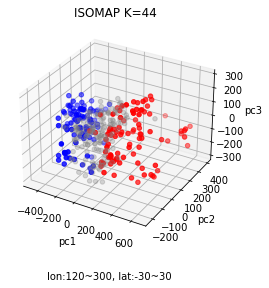

In [41]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
# ax.set_xlim(-250,250)
# ax.set_ylim(-80,120)
ax.scatter(eig_vec_cov[oni>=0.5,0],eig_vec_cov[oni>=0.5,1],eig_vec_cov[oni>=0.5,2],color=[1,0,0])
ax.scatter(eig_vec_cov[oni<=-0.5,0],eig_vec_cov[oni<=-0.5,1],eig_vec_cov[oni<=-0.5,2],color=[0,0,1])
ax.scatter(eig_vec_cov[oni_id==0,0],eig_vec_cov[oni_id==0,1],eig_vec_cov[oni_id==0,2],color=[0.5,0.5,0.5],alpha=0.3)
ax.set_xlabel(f'pc1')
ax.set_ylabel(f'pc2')
ax.set_zlabel(f'pc3')
ax.set_title(f'ISOMAP K={k}')
fig.text(s=f'lon:{lon1}~{lon2}, lat:{lat1}~{lat2} ', x=0.5, y=0, fontsize=10, ha='center', va='center')
plt.show()

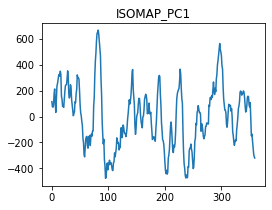

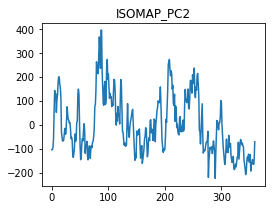

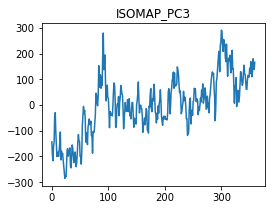

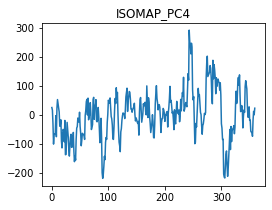

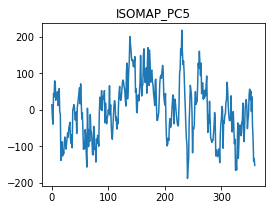

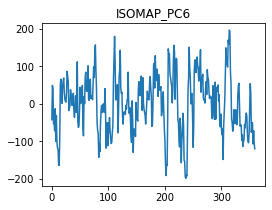

In [42]:
plt.figure(figsize=(4,3))
plt.plot(eig_vec_cov[:,0])
plt.title(f'ISOMAP_PC1')
plt.show()
plt.figure(figsize=(4,3))
plt.plot(eig_vec_cov[:,1])
plt.title(f'ISOMAP_PC2')
plt.show()
plt.figure(figsize=(4,3))
plt.plot(-eig_vec_cov[:,2])
plt.title(f'ISOMAP_PC3')
plt.show()
plt.figure(figsize=(4,3))
plt.plot(eig_vec_cov[:,3])
plt.title(f'ISOMAP_PC4')
plt.show()
plt.figure(figsize=(4,3))
plt.plot(eig_vec_cov[:,4])
plt.title(f'ISOMAP_PC5')
plt.show()
plt.figure(figsize=(4,3))
plt.plot(eig_vec_cov[:,5])
plt.title(f'ISOMAP_PC6')
plt.show()

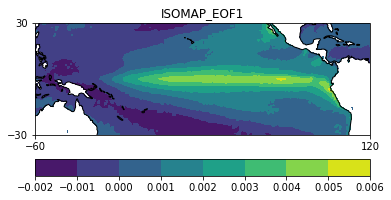

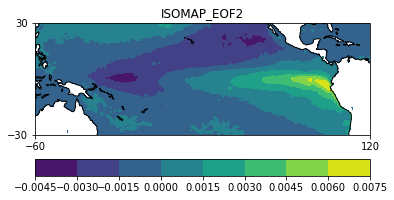

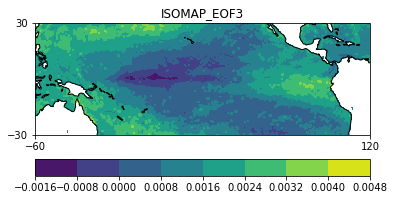

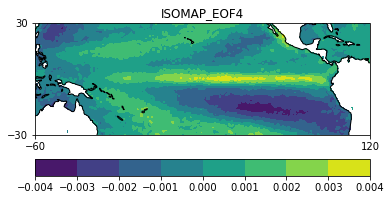

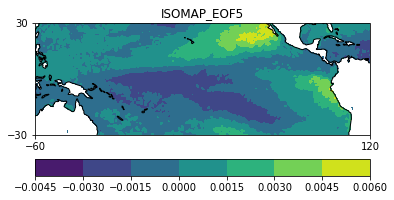

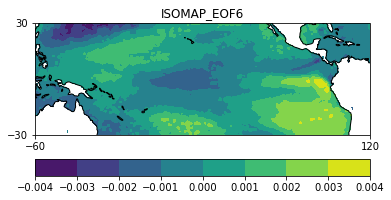

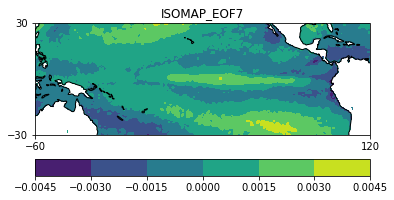

In [43]:
mode = np.matmul(X_variation.transpose(),pc__).transpose()
for n in range(7):
    iEOF = n
    ll=[np.arange(-0.004,0.011,0.002),np.arange(-0.01,0.0126,0.0025),np.arange(-0.006,0.011,0.002)]
    lll=[1,1,-1,1,-1,1,1]
    i=0
    for idx, tmp in np.ndenumerate(data):
        if(data.mask[idx]==True): continue
        data[idx]=mode[iEOF,i]
        i = i+1
    projection = ccrs.PlateCarree(central_longitude=180)
    fig, ax = plt.subplots(subplot_kw={'projection': projection},figsize=(6,3))
    # pcm = ax.contourf(lons-180, lats, data*lll[n], levels=ll[n], transform=projection)
    pcm = ax.contourf(lons-180, lats, data*lll[n], transform=projection)
    # pcm = ax.contourf(lons-180, lats, data, transform=projection)
    ax.coastlines()
    ax.set_title(f'ISOMAP_EOF{iEOF+1}')
    ax.set_xticks([lon1,lon2], crs=ccrs.PlateCarree())
    ax.set_yticks([lat1,lat2], crs=ccrs.PlateCarree())
    fig.colorbar(pcm, ax=ax, orientation="horizontal")
    plt.show()

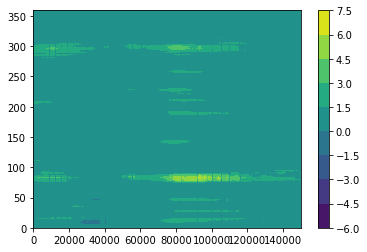

In [44]:
happy = np.zeros_like(X_variation)
err_isomap=[]
for i in range(20):
    happy += np.outer(eig_vec_cov[:,i].real,mode[i,:].real)
    cc = np.sum(np.dot(happy.flatten()-np.mean(happy.flatten()),X_variation.flatten()-np.mean(X_variation.flatten())))**2/\
        np.sum(np.square(happy.flatten()-np.mean(happy.flatten())))/\
        np.sum(np.square(X_variation.flatten()-np.mean(X_variation.flatten())))
    err_isomap.append(1-cc)
plt.figure()
plt.contourf(happy, levels=np.arange(-6,7.6,1.5))
plt.colorbar()
plt.show()

[0.6540241547885073, 0.567212129935623, 0.4894343693159353, 0.458662982615364, 0.4281459467268862, 0.40682537919341566, 0.38913854185927066, 0.3802048606322024, 0.37800600284355745, 0.37081251338188925, 0.36656853650920196, 0.356437466488266, 0.3546694560458057, 0.35199153396383254, 0.3421702972884997, 0.3357734431110171, 0.32652356997675835, 0.32129494922964974, 0.31724459244351066, 0.31448736775301667]


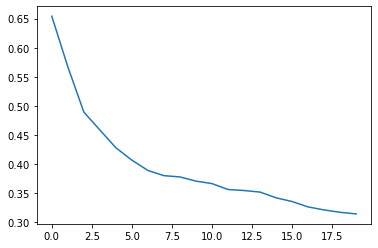

In [45]:
print(err_isomap)
plt.plot(err_isomap)

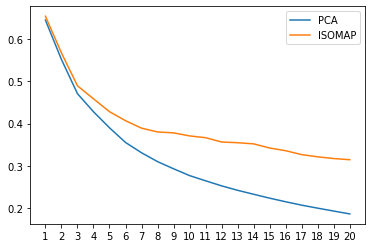

In [46]:
fig, ax = plt.subplots()
ax.plot(np.arange(1,21),err_pca)
ax.plot(np.arange(1,21),err_isomap)
ax.legend(['PCA','ISOMAP'])
ax.set_xticks(np.arange(1,21))
plt.show()